In [20]:
# _*_ conding: utf-8 _*_ 

"""
JupyterLabになれる。
お題：
Kawahara-sanバトラーボルマー式modelに温度項を加えてSimする。
1. そのまま温度項を加えて温度があがるほど、抵抗が下がるをGraph化したい。
　　　→繰り返し計算はできたような気がする。Graph化ができない(´・ω・｀)
2. i0に温度項io=ie*nF*exp(-Ea / RT)を代入して活性化E項を入れてi0の温度依存性を表現する。
3. 拡散項で拡散律速になることを表現する。
"""

In [36]:
# モジュールのインポート
import numpy as np
import pandas as pd #なくてもいいはず
import matplotlib.pyplot as plt
import sympy as sym #なくてもいいはず

# Overpotential by Butler-volmer equation
\\begin{eqnarray*}
j = j_0 \\left( \\exp \\left[\\frac{\\alpha_a zF\\eta}{RT}\\right] - \\exp \\left[-\\frac{\\alpha_c zF\\eta}{RT}\\right]\\right)
j_0 = zFk^o(C_e)^{\\alpha_a}(C_{s,max}-C_s)^{\\alpha_a}(C_s)^{\\alpha_c},
\\end{eqnarray*}

In [22]:
#graph color
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

# Model 1 そのまま温度項を加えて温度があがるほど、抵抗が下がるをGraph化する。

In [23]:
R = 8.3144598#[J/(mol K)]
F = 96485.33289#[C/mol]
z = 1
alpha=0.5
k_o_p = 7.13E-8
k_o_n = 1.47E-7
# T = 298 定数削除

C_e = 1000#[mol/m3]
C_s_max_p = 2.39E2#[mol/m3]
C_s_max_n = 1.61E2#[mol/m3]

In [24]:
j_0_p = z*F*k_o_p*C_e**alpha*(C_s_max_p - 0.5*C_s_max_p)**alpha*(0.5*C_s_max_p)**alpha#[A/m2]
j_0_n = z*F*k_o_n*C_e**alpha*(C_s_max_n - 0.5*C_s_max_n)**alpha*(0.5*C_s_max_n)**alpha#[A/m2]

In [25]:
eta = ((np.arange(101))-50)/400
T = [273, 283, 293, 303, 313, 323] #Tのリスト作成

In [29]:
#リストのTだけ計算を繰り返す。ごり押しで全部計算。
j_p_c_0 = j_0_p*(- np.exp(-1*((1 - alpha) * z * F * eta) / (R*T[0])))
j_p_a_0 = j_0_p*(np.exp((alpha * z * F * eta) / (R*T[0])))
j_p_c_1 = j_0_p*(- np.exp(-1*((1 - alpha) * z * F * eta) / (R*T[1])))
j_p_a_1 = j_0_p*(np.exp((alpha * z * F * eta) / (R*T[1])))
j_p_c_2 = j_0_p*(- np.exp(-1*((1 - alpha) * z * F * eta) / (R*T[2])))
j_p_a_2 = j_0_p*(np.exp((alpha * z * F * eta) / (R*T[2])))
j_p_c_3 = j_0_p*(- np.exp(-1*((1 - alpha) * z * F * eta) / (R*T[3])))
j_p_a_3 = j_0_p*(np.exp((alpha * z * F * eta) / (R*T[3])))
j_p_c_4 = j_0_p*(- np.exp(-1*((1 - alpha) * z * F * eta) / (R*T[4])))
j_p_a_4 = j_0_p*(np.exp((alpha * z * F * eta) / (R*T[4])))
j_p_c_5 = j_0_p*(- np.exp(-1*((1 - alpha) * z * F * eta) / (R*T[5])))
j_p_a_5 = j_0_p*(np.exp((alpha * z * F * eta) / (R*T[5])))

↓ごり押しで全部グラフ化

323


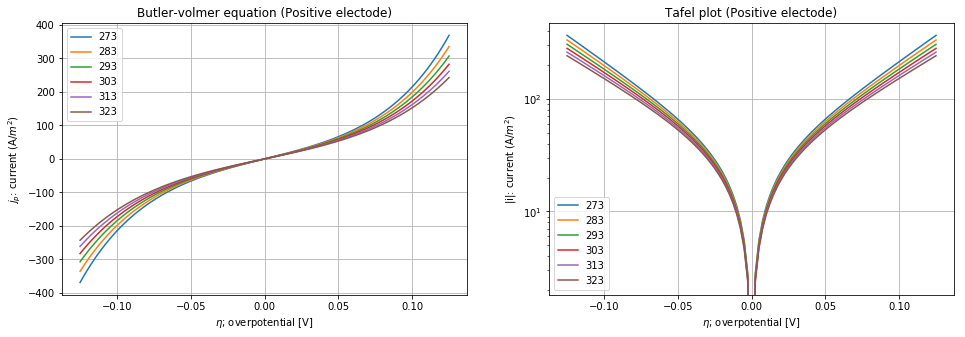

In [44]:
#graph
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 5))

#ax1.plot(eta, (j_p_c_0), label = '$j_{pc}$', color=new_colors[0])
#ax1.plot(eta, (j_p_a_0), label = '$j_{pa}$', color=new_colors[1])
ax1.plot(eta, (j_p_c_0 + j_p_a_0), label = T[0], color=new_colors[0])
ax1.plot(eta, (j_p_c_1 + j_p_a_1), label = T[1], color=new_colors[1])
ax1.plot(eta, (j_p_c_2 + j_p_a_2), label = T[2], color=new_colors[2])
ax1.plot(eta, (j_p_c_3 + j_p_a_3), label = T[3], color=new_colors[3])
ax1.plot(eta, (j_p_c_4 + j_p_a_4), label = T[4], color=new_colors[4])
ax1.plot(eta, (j_p_c_5 + j_p_a_5), label = T[5], color=new_colors[5])

#ax1.set_yscale('log')
ax1.grid()

ax1.set_ylabel('$j_p$: current (A/$m^2$)')
ax1.set_xlabel('$\eta$; overpotential [V]')
ax1.legend()
ax1.set_title('Butler-volmer equation (Positive electode)')

ax2.plot(eta, abs(j_p_c_0 + j_p_a_0), label = T[0], color=new_colors[0])
ax2.plot(eta, abs(j_p_c_1 + j_p_a_1), label = T[1], color=new_colors[1])
ax2.plot(eta, abs(j_p_c_2 + j_p_a_2), label = T[2], color=new_colors[2])
ax2.plot(eta, abs(j_p_c_3 + j_p_a_3), label = T[3], color=new_colors[3])
ax2.plot(eta, abs(j_p_c_4 + j_p_a_4), label = T[4], color=new_colors[4])
ax2.plot(eta, abs(j_p_c_5 + j_p_a_5), label = T[5], color=new_colors[5])

print(T[i])

ax2.set_yscale('log')
ax2.grid()

ax2.set_ylabel('|i|: current (A/$m^2$)')
ax2.set_xlabel('$\eta$; overpotential [V]')
ax2.legend()
ax2.set_title('Tafel plot (Positive electode)')

plt.show()

# Model2 i0に温度項io=ie*nF*exp(-Ea / RT)を代入して活性化E項を入れてi0の温度依存性を表現する。

In [ ]:
"""
定数項だったk_0_p, k_0_nに
k_0_p, k_0_n=k_e_p*exp(-Ea_p / R*T[i]), k_e_p*exp(-Ea_n / R*T[i]), が入る
k_e_p, ke_e_n, Ea_p, Ea_nには新しい定数値が必要だが文献値なし(探してない。。。)
k_e_p=1, k_e_n=1とし、
k_0_p, k_0_nの逆算値からke_0_p, ke_0_nとしておこうかな。ってかPythonで溶けないかな。
7.13E-8＝k_e_p*exp(-Ea_p / 8.3144598*298)
1.47E-7＝k_e_n*exp(-Ea_n / 8.3144598*298)
"""

In [ ]:
j_0_p_T_0 = z*F*k_o_p*C_e**alpha*(C_s_max_p - 0.5*C_s_max_p)**alpha*(0.5*C_s_max_p)**alpha#[A/m2]
j_0_n_T_0 = z*F*k_o_n*C_e**alpha*(C_s_max_n - 0.5*C_s_max_n)**alpha*(0.5*C_s_max_n)**alpha#[A/m2]

↓リストの理解用()

In [31]:
print(T)

[273, 283, 293, 303, 313, 323]


In [32]:
for i in range(len(T)):
    print(i)

0
1
2
3
4
5


In [14]:
for i in range(len(T)):
    print(T[i])
print(T[0])

273
283
293
303
313
323
273
